Αϊβαλής Θεόδωρος 03117099

Σαλιαράκης Παύλος 03117135

##ΕΙΣΑΓΩΓΗ

Στόχος της εργασίας είναι η μελέτη και βελτιστοποίηση ταξινομητών σε σύνολα δεδομένων. Θα μελετήσουμε δύο datasets, ένα από το αποθετήριο UCI και ένα από την πλατφόρμα Kaggle.

Η εκπαιδευση και βελτιστοποίηση των ταξινομητών στο UCI dataset θα γίνει αποκλειστικά με τις συναρτήσεις του skicit-learn ενώ στο Kaggle dataset θα πρέπει να χρησιμοποιήσετε μια βιβλιοθήκη βελτιστοποίησης.

Υπάρχουν 14 διαφορετικά UCI datasets (U01-U14) και 14 διαφορετικά Kaggle datasets (K01-K14). Στην ομάδα μας αντιστοιχεί ένας μοναδικός συνδυασμός U-K datasets. Τα δικά μας datasets είναι: U01 & K14

Το U01 είναι ένα Echocardiogram Data Set και το Κ14 είναι CS:GO Round Winner Classification.

In [ ]:
!pip install --upgrade pandas
!pip install --upgrade numpy 
!pip install --upgrade scikit-learn 
!pip install --upgrade scipy 
!pip install --upgrade pip 
!pip install --upgrade matplotlib 
!pip install --upgrade imbalanced-learn

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.svm import SVC, LinearSVC
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
import matplotlib.pyplot as plt
from imblearn.pipeline import Pipeline
#from sklearn.pipeline import Pipeline
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler 
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn import neighbors
import seaborn as sns
import time

##ΜΕΡΟΣ 1 (UCI dataset)

#Εισαγωγή και επισκόπηση

Τα δεδομένα μας από το UCI είναι το echocardiogram.data που περιέχει καρδιογραφήματα και δίνει στοιχεία σχετικά με την πιθανότητα επιβίωσης ενός ασθενή για τουλάχιστον ένα έτος από τότε που υπέστη καρδιακή προσβολή.

Το αρχείο μας δίνεται κατευθείαν σε .data format και έτσι δεν χρειάζεται να κάνουμε μετατροπές.

In [ ]:
!wget "http://archive.ics.uci.edu/ml/machine-learning-databases/echocardiogram/echocardiogram.data"

--2021-11-27 16:51:23--  http://archive.ics.uci.edu/ml/machine-learning-databases/echocardiogram/echocardiogram.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6107 (6.0K) [application/x-httpd-php]
Saving to: ‘echocardiogram.data.3’

echocardiogram.data 100%[===================>]   5.96K  --.-KB/s    in 0s      

2021-11-27 16:51:24 (661 MB/s) - ‘echocardiogram.data.3’ saved [6107/6107]



Βλέπουμε ότι στα δεδομένα που μας δίνονται υπάρχει ένα περιττό κόμμα στην σειρά 50 το οποίο και αφαιρούμε

Τo dataset μας αποτελείται από 132 δείγματα και τα χαρακτηριστικά τους είναι 13.

Παρατηρώντας το αρχείο echocardiogram.names καθώς και το αρχείο με τα στοιχεία βλέπουμε ότι οι στήλες - χαρακτηριστικά 10 και 12 μπορούν να μην ληφθούν υπόψιν στην μελέτη του dataset αφού το χαρακτηριστικό 10 (mult) είναι η παράγωγος μιας διακύμανσης η οποία μπορεί να παραληφθεί. Το 12 αναφέρεται στο αρχείο ως ανούσιο. Επίσης κοιτώντας αναλυτικά τα χαρακτηριστικά μπορούμε να καταλάβουμε ότι το 9 θα μπορούσε να αντικαταστήσει το 8. 

Σχετικά με το αν τα χαρακτηριστικά είναι διατεταγμένα βλέπουμε ότι σε όλα υπάρχει εμφανής διάταξη εκτός από το 12 (name) από το οποίο δεν μπορεί να προκύψει κάποια διάταξη μεταξύ των δειγμάτων.

In [ ]:
all_data = pd.read_csv("echocardiogram.data",delimiter = ',',header = None)
print(all_data.shape)

(132, 13)


Αφού οργανώσουμε αρχικά τα δεδομένα σε έναν πίνακα με βάση το που βρίσκονται τα κόμματα στο αρχείο εισόδου echocardiogram.data αφαιρούμε τις στήλες που παρουσιάζουν δεδομένα τα οποία μπορούν να παραλειφθούν ή δεν είναι τόσο σημαντικα.


Σχετικά με τις επικεφαλίδες αυτές δεν υπάρχουν και η αρίθμηση γραμμών γίνεται από τη βιβλιοθήκη pandas όπως φαίνεται και από τον κώδικα παρακάτω.

In [ ]:
data = all_data.values
data = np.delete(data, 11, 1)
data = np.delete(data, 10, 1)
data = np.delete(data, 9, 1)
print(data)
print(data.shape)

[['11' '0' '71' ... '14' '1' '0']
 ['19' '0' '72' ... '14' '1.700' '0']
 ['16' '0' '55' ... '14' '1' '0']
 ...
 ['36' '0' '69' ... '14.5' '1.21' '?']
 ['22' '0' '57' ... '15' '1.36' '?']
 ['20' '0' '62' ... '15.5' '1.409' '?']]
(132, 10)


Σχετικά με τις ετικέτες των κλάσεων αυτές βρίσκονται στην τελευταία στήλη των δεδομένων και μας σείχνει αν ο ασθενής έχει ζήσει για έναν και πλέον χρόνια από τη στιγμή της καρδιακής προσβολής.

Παρατηρούμε ότι στο αρχείο των δεδομένων έχουμε κάποιες τιμές που δεν γνωρίζουμε (απουσιάζουσες τιμές) οι οποίες για κάποιο λόγω απουσιάζουν από το dataset.

In [ ]:
missing_values = 0
for i in range (data.shape[0]):
  for j in range (data.shape[1]):
    if data[i][j] == "?":
      missing_values = missing_values + 1
      break
missing_level = missing_values/data.shape[0]*100 
print("Τα δείγματα με απουσιάζουσες τιμές είναι:", missing_values)
print("Το ποσοστό των δειγμάτων με απουσιάζουσες τιμές είναι:", missing_level, "%")

Τα δείγματα με απουσιάζουσες τιμές είναι: 71
Το ποσοστό των δειγμάτων με απουσιάζουσες τιμές είναι: 53.78787878787878 %


Έχουμε δύο οι οποίες δηλώνουν αν ο ασθενής κατάφερε να ζήσει ή όχι για τον ένα επόμενο χρόνο. 

Μπορούμε να βρούμε το πλήθος των δειγμάτων κάθε κλάσης και το ποσοστό που αυτά αντιστοιχούν. Δεν συνυπολογίσαμε τα missing values. 

In [ ]:
zeros_values = 0
ones_values = 0
missing_values_10 = 0
for i in range (data.shape[0]):
  if (data[i][9] == "0"):
    zeros_values += 1
  elif (data[i][9] =="1"):
    ones_values += 1
  else:
    missing_values_10 += 1
print("Πλήθος δειγμάτων της κλασης 0:", zeros_values)
print("Πλήθος δειγμάτων της κλασης 1:", ones_values)

print("Ποσοστό δειγμάτων της κλάσης 0(στα συνολικά δείγματα):", zeros_values/data.shape[0]*100, "%")
print("Ποσοστό δειγμάτων της κλάσης 1(στα συνολικά δείγματα):", ones_values/data.shape[0]*100, "%")

print("Ποσοστό δειγμάτων της κλάσης 0(στα μη αποσιάζοντα δείγματα):", zeros_values/(data.shape[0] - missing_values_10) *100, "%")
print("Ποσοστό δειγμάτων της κλάσης 1(στα μη απουσιάζοντα δείγματα):", ones_values/(data.shape[0] - missing_values_10) *100, "%")

Πλήθος δειγμάτων της κλασης 0: 50
Πλήθος δειγμάτων της κλασης 1: 24
Ποσοστό δειγμάτων της κλάσης 0(στα συνολικά δείγματα): 37.878787878787875 %
Ποσοστό δειγμάτων της κλάσης 1(στα συνολικά δείγματα): 18.181818181818183 %
Ποσοστό δειγμάτων της κλάσης 0(στα μη αποσιάζοντα δείγματα): 67.56756756756756 %
Ποσοστό δειγμάτων της κλάσης 1(στα μη απουσιάζοντα δείγματα): 32.432432432432435 %


Αν θεωρήσουμε ότι ένα dataset είναι μη ισορροπημένο αν μια οποιαδήποτε κλάση είναι 1.5 φορά πιο συχνή από κάποια άλλη (60%-40% σε binary dataset) βλέπουμε ότι εδώ δεν είναι ισορροπημένο.

#Προετοιμασία

Θα διαχωρίσουμε το σύνολο σε train set και test set με 30% των δειγμάτων στο test set (και 70% στο train set).

Στην αρχή θα χρειαστεί να αφαιρέσουμε τα δείγματα που έχουν ετικέτα = "?". Στα υπόλοιπα δείγματα θα κάνουμε μια αντικατάσταση με μια άλλη τιμή.

Θα βρούμε την median τιμή της κάθε στήλης ώστε να τη βάλουμε στην θέση του "?".

In [ ]:
data = data[np.logical_not(data[:,9] == '?')]
data = np.where(data=="?", np.NaN, data)
imp_mean = SimpleImputer(missing_values= np.NaN, strategy='median')
imp_mean.fit(data)
data = imp_mean.transform(data)
features_all = preprocessing.scale(data)[:,:9]
labels_all = data[:,9]
X_train, X_test, y_train, y_test = train_test_split(features_all, labels_all, test_size=0.3, random_state=2)

print("X_train:",X_train.shape)
print("y_train:",y_train.shape)

print("X_test:",X_test.shape)
print("y_test:",y_test.shape)

X_train: (51, 9)
y_train: (51,)
X_test: (23, 9)
y_test: (23,)


Άρα βλέπουμε ότι έχουμε 51 δείγματα για train και άλλα 23 για test.

#Ταξινόμηση

Στο UCI dataset θα μελετήσουμε τους εξής ταξινομητές:

-dummy

-Gaussian Naive Bayes (GNB),

-KNeirestNeighbors (kNN), και

-Logistic Regression (LR).

In [ ]:
def Baseline_approach(classifier,X_train,X_test,y_train,y_test):
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    print(str(classifier),classifier.score(X_test,y_test))
    print("f1 macro score =",f1_score(y_test, y_pred, average='macro'))
    print("accuracy score =",accuracy_score(y_test, y_pred))
    cf_matrix = confusion_matrix(y_pred,y_test)
    sns.heatmap(cf_matrix, annot=False, cmap='nipy_spectral')
    return classifier

def plot(clfs,score1,score,function,approach):
    plt.bar(clfs,score1)
    plt.title(approach + " " + score + " with " + function + " average")
    plt.savefig(approach + "_" + score + "_with_"+ function + "_average.jpg")
    plt.show()

def averaged_plots(classifierlist,X_test,y_test,approach):
    clfs  = ['Uni', 'Strat',"Freq","Prior","Con 0","Con 1", 'GNB', 'KNN','LR']
    score_macro = []
    accuracy = []
    for classifier in classifierlist:        
        y_pred = classifier.predict(X_test)
        score_macro.append(f1_score(y_test, y_pred, average = 'macro'))        
        accuracy.append(accuracy_score(y_test, y_pred))
       
    plot(clfs,score_macro,"score","macro",approach)
    plot(clfs,accuracy,"accuracy","macro",approach)

##DummyClassifier

Ο DummyClassifier είναι ένας ταξινομητής που κάνει προβλέψεις χρησιμοποιώντας απλούς κανόνες.

Αυτός ο ταξινομητής είναι χρήσιμος για σύγκριση με άλλους ταξινομητές. Συνήθως δεν γίνεται χρήση για απλά προβλήματα.

Η παράμετρος strategy μπορεί να πάρει τις εξής τιμές:

"stratified": δημιουργεί προβλέψεις με σεβασμό στην κατανομή της τάξης του training set.

"most_frequent": προβλέπει πάντα την πιο συχνή ετικέτα στο training set.

"prior": προβλέπει πάντα την κλάση που μεγιστοποιεί την κλάση (όπως στο "most_frequent") και επίσης επιστρέφει την prior κλάση.

"uniform": δημιουργεί προβλέψεις ομοιόμορφα τυχαία.

"constant": προβλέπει πάντα μια constant ετικέτα που παρέχεται από τον χρήστη. Αυτό είναι χρήσιμο για μετρήσεις που αξιολογούν μια non-majority τάξη.

DummyClassifier(strategy='uniform') 0.5652173913043478
f1 macro score = 0.50682261208577
accuracy score = 0.5217391304347826


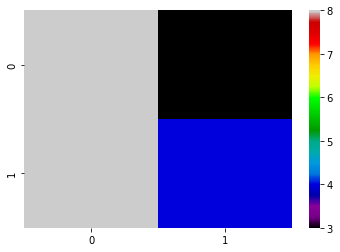

In [ ]:
dc_uniform = DummyClassifier(strategy="uniform")
uniform = Baseline_approach(dc_uniform,X_train,X_test,y_train,y_test)

DummyClassifier(strategy='stratified') 0.5652173913043478
f1 macro score = 0.3935091277890467
accuracy score = 0.43478260869565216


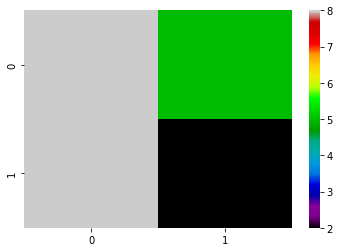

In [ ]:
dc_stratified = DummyClassifier(strategy="stratified")
stratified = Baseline_approach(dc_stratified,X_train,X_test,y_train,y_test)

DummyClassifier(strategy='most_frequent') 0.6956521739130435
f1 macro score = 0.41025641025641024
accuracy score = 0.6956521739130435


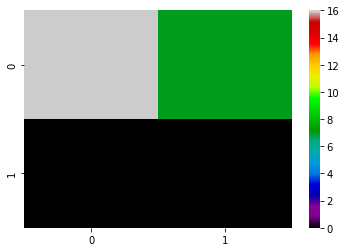

In [ ]:
dc_most_frequent = DummyClassifier(strategy="most_frequent")
most_frequent = Baseline_approach(dc_most_frequent,X_train,X_test,y_train,y_test)

DummyClassifier() 0.6956521739130435
f1 macro score = 0.41025641025641024
accuracy score = 0.6956521739130435


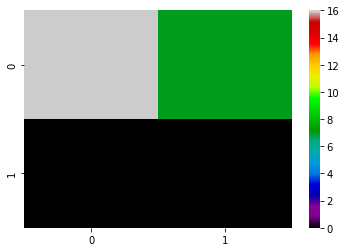

In [ ]:
dc_prior = DummyClassifier(strategy="prior")
prior = Baseline_approach(dc_prior,X_train,X_test,y_train,y_test)

DummyClassifier(constant=0.0, strategy='constant') 0.6956521739130435
f1 macro score = 0.41025641025641024
accuracy score = 0.6956521739130435


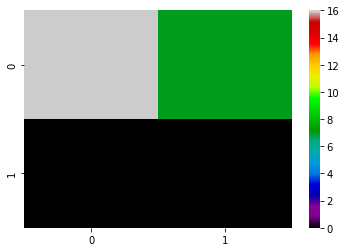

In [ ]:
dc_constant_0 = DummyClassifier(strategy="constant", constant = 0.0)
constant_0 = Baseline_approach(dc_constant_0,X_train,X_test,y_train,y_test)

DummyClassifier(constant=1.0, strategy='constant') 0.30434782608695654
f1 macro score = 0.23333333333333334
accuracy score = 0.30434782608695654


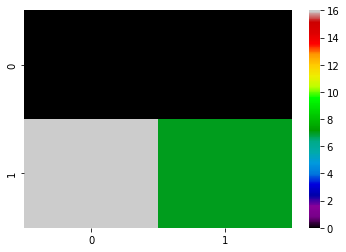

In [ ]:
dc_constant_1 = DummyClassifier(strategy="constant", constant = 1.0)
constant_1 = Baseline_approach(dc_constant_1,X_train,X_test,y_train,y_test)

##Gaussian

H βασική ιδέα λειτουργίας του ταξινομητή είναι o νόμος του Bayes $$P(A\mid B)={\frac {P(B\mid A)\,P(A)}{P(B)}}$$

και η (naive) υπόθεση ότι τα χαρακτηριστικά είναι όλα ανεξάρτητα μεταξύ τους πράγμα που δεν ισχύει στην πραγματικότητα. 

Με δεδομένα μια μεταβλητή κατηγορίας (κλάσης) $y$ και ένα εξαρτώμενο διάνυσμα χαρακτηριστικών $x_1$ μέχρι $x_n$, σύμφωνα με το θεώρημα του Bayes θα ισχύει 
$$P(y \mid x_1, \dots, x_n) = \frac{P(y) P(x_1, \dots x_n \mid y)}{P(x_1, \dots, x_n)}$$
Ισχύει ότι $P(x_1, \dots, x_i, \dots, x_n \mid y) =  \prod_{i=1}^{n} P(x_i | y, x_1, \dots, x_{i-1}, x_{i+1}, \dots, x_n)$ και κάνουμε την αφελή υπόθεση ότι το χαρακτηριστικό $x_i$ για κάθε $i$ εξαρτάται μόνο από την κλάση $y$ και όχι από οποιοδήποτε άλλο χαρακτηριστικό
$$P(x_i | y, x_1, \dots, x_{i-1}, x_{i+1}, \dots, x_n) = P(x_i | y)$$
αυτό οδηγεί στην απλοποίηση
$$P(y \mid x_1, \dots, x_n) = \frac{P(y) \prod_{i=1}^{n} P(x_i \mid y)}{P(x_1, \dots, x_n)}$$
Με δεδομένη είσοδο, το $P(x_1, \dots, x_n)$ είναι σταθερό. Συνεπώς μπορούμε να χρησιμοποιήσουμε τον ακόλουθο κανόνα ταξινόμησης $$P(y \mid x_1, \dots, x_n) \propto P(y) \prod_{i=1}^{n} P(x_i \mid y)$$
$$\Downarrow$$
$$\hat{y} = \arg\max_y P(y) \prod_{i=1}^{n} P(x_i \mid y)$$
Το $P(y)$ είναι η υπόθεσή μας και ισούται με τη σχετική συχνότητα της κλάσης $y$ στο training set. To $P(x_i \mid y)$ είναι η πιθανοφάνεια δηλαδή η πιθανότητα του δείγματος με δεδομένη την υπόθεσή μας και μπορεί επίσης να υπολογιστεί απλά από το training set. Οι διάφοροι Naive Bayes classifiers διαφοροποιούνται κυρίως από τις υποθέσεις που κάνουν ως προς την κατανομή $P(x_i \mid y)$. Η κλάση $\hat{y}$ που ανατίθεται σε ένα νέο δείγμα είναι αυτή που μεγιστοποιεί το δεξί μέλος της σχέσης.

GaussianNB() 0.9130434782608695
f1 macro score = 0.9041666666666668
accuracy score = 0.9130434782608695


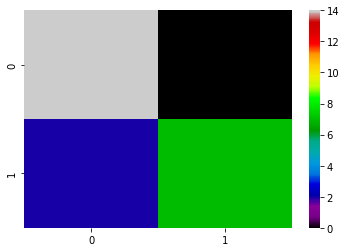

In [ ]:
clf = GaussianNB()
GNB = Baseline_approach(clf,X_train,X_test,y_train,y_test)

##kNN

Είναι ταξινομητής που εφαρμόζει την ψηφοφορία k-nearest neighboors.
Μια από τις παραμέτρους είναι το:

n_neighbors : int, default=5

KNeighborsClassifier() 0.9565217391304348
f1 macro score = 0.9505376344086022
accuracy score = 0.9565217391304348


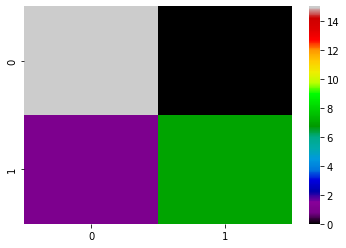

In [ ]:
clf = KNeighborsClassifier()
Knn = Baseline_approach(clf,X_train,X_test,y_train,y_test)

##Logistic Regression 


Πρόκειται για ένα μοντέλο λογιστικής παλινδρόμησης.

Στο software χρησιμοποιείται για να κατανοησουμε τη σχέση μεταξύ μιας εξαρτημένης μεταβλητής έναντι των ανεξάρτητων υπολολίζοντας τις πιθανότητές τους χρησιμοπιώντας μια εξίσωση λογιστικής παλινδρόμησης.

LogisticRegression() 0.9565217391304348
f1 macro score = 0.9505376344086022
accuracy score = 0.9565217391304348


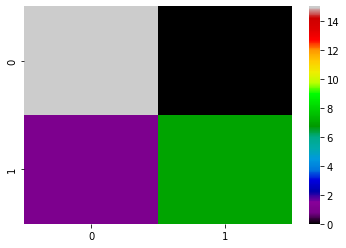

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
LR = Baseline_approach(clf,X_train,X_test,y_train,y_test)

##Μετρικές


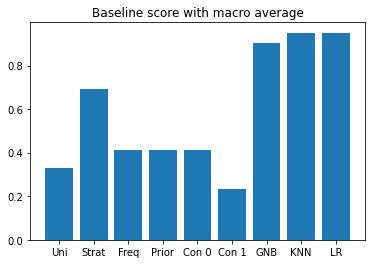

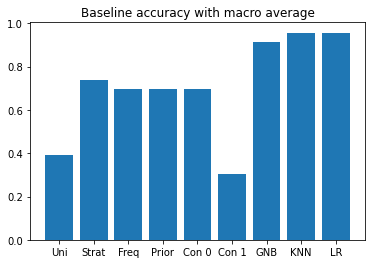

In [ ]:
classifierlist = [uniform,stratified,most_frequent,prior,constant_0,constant_1,GNB,Knn,LR]
averaged_plots(classifierlist,X_test,y_test,"Baseline")

Βλέπουμε ξεκάθαρα και από τις 2 μετρικές ότι ο kNN και ο LR πετυχαίνουν τα καλύτερα αποτελέσματα με τον Gaussian Naive Bayes να είναι λίγο χειρότερος.
Όπως αναμέναμε ο dummy δεν έχει καλές αποδόσεις.

#Βελτιστοποίηση


## ΠΡΟΕΠΕΞΕΡΓΑΣΙΑ



Σε πολλά προβλήματα ταξινόμησης η προεπεξεργασία είναι ένα πολύ σημαντικό και χρονοβόρο κομμάτι ολόκληρης της διαδικασίας το οποίο όμως συχνά έχει πολύ μεγάλο αντίκτυπο στην επίδοση του συστήματος. 

Τα βήματα προεπεξεργασίας στοχεύουν:
* Στην αφαίρεση η αντικατάσταση απουσιάζουσων τιμών από το dataset
* Στη μετατροπή των κατηγορικών μεταβλητών κατάλληλα ώστε να μπορούν να τους διαχειριστούν αλγόριθμοι μηχανικής μάθησης
* Στην επιλογή ή εξαγωγή των κατάλληλων χαρακτηριστικών για το μοντέλο μας

Αρχικά κάνουμε μείωση των χαρακτηριστικών εισόδου και βλέπουμε ποιά χαρακτηριστικά κρατάμε και ποιά όχι. 
Μετά από μια προσαρμογή του κατωφλίου κάνουμε κανονικοποίηση των χαρακτηριστικών και εξισσοροπούμε το training set με oversampling.

In [ ]:
from sklearn.feature_selection import VarianceThreshold
from sklearn import preprocessing
from imblearn.over_sampling import RandomOverSampler

In [ ]:
selector = VarianceThreshold() # default threshold = 0
X_train_reduced = selector.fit_transform(X_train)
mask = selector.get_support()
X_test_reduced = selector.transform(X_test)

In [ ]:
selector = VarianceThreshold(threshold=0.00005)
X_train_reduced = selector.fit_transform(X_train)
print(X_train.shape)
print(X_train_reduced.shape)
mask = selector.get_support()
X_test_reduced = selector.transform(X_test)
print(X_test_reduced.shape)

(51, 9)
(51, 9)
(23, 9)


In [ ]:
scaler = preprocessing.StandardScaler().fit(X_train_reduced)
X_train_scaled = scaler.transform(X_train_reduced)
X_test_scaled = scaler.transform(X_test_reduced)
summ = X_train_scaled.T.sum(axis=1)
print(summ)

[ 2.22044605e-16  8.88178420e-16 -3.38618023e-15  3.21964677e-15
 -8.88178420e-16 -1.99840144e-15  6.66133815e-16  0.00000000e+00
 -8.88178420e-16]


In [ ]:
ros = RandomOverSampler()
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_scaled, y_train)
print(X_train.shape)
print(X_train_resampled.shape)
print(y_train_resampled.shape)
summ = X_train_resampled.T.sum(axis=1)
print(summ) 

(51, 9)
(68, 9)
(68,)
[-18.78710089  21.16482932  14.96175518   2.35747583  -5.59053513
   8.09253617   9.08925448  15.44030107  16.90940134]


### Dummy Classifier

DummyClassifier(strategy='uniform') 0.43478260869565216
f1 macro score = 0.5576923076923077
accuracy score = 0.5652173913043478


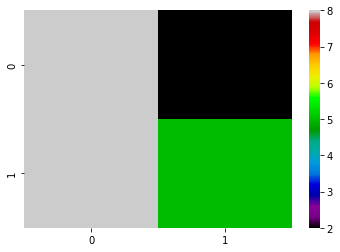

In [ ]:
uniform = Baseline_approach(dc_uniform,X_train_resampled,X_test_scaled,y_train_resampled,y_test)

DummyClassifier(strategy='stratified') 0.30434782608695654
f1 macro score = 0.5180952380952382
accuracy score = 0.5217391304347826


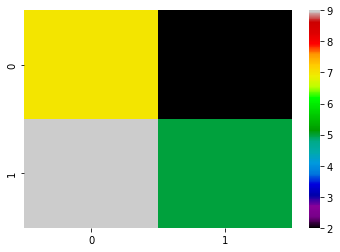

In [ ]:
stratified = Baseline_approach(dc_stratified,X_train_resampled,X_test_scaled,y_train_resampled,y_test)

DummyClassifier(strategy='most_frequent') 0.6956521739130435
f1 macro score = 0.41025641025641024
accuracy score = 0.6956521739130435


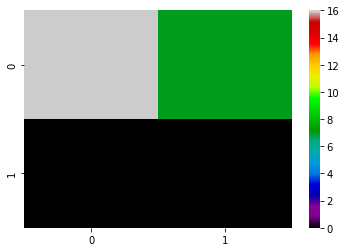

In [ ]:
most_frequent = Baseline_approach(dc_most_frequent,X_train_resampled,X_test_scaled,y_train_resampled,y_test)

DummyClassifier() 0.6956521739130435
f1 macro score = 0.41025641025641024
accuracy score = 0.6956521739130435


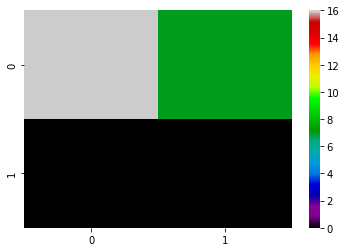

In [ ]:
prior = Baseline_approach(dc_prior,X_train_resampled,X_test_scaled,y_train_resampled,y_test)

DummyClassifier(constant=0.0, strategy='constant') 0.6956521739130435
f1 macro score = 0.41025641025641024
accuracy score = 0.6956521739130435


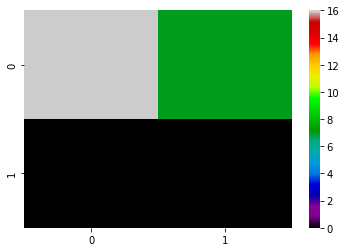

In [ ]:
constant_0 = Baseline_approach(dc_constant_0,X_train_resampled,X_test_scaled,y_train_resampled,y_test)

DummyClassifier(constant=1.0, strategy='constant') 0.30434782608695654
f1 macro score = 0.23333333333333334
accuracy score = 0.30434782608695654


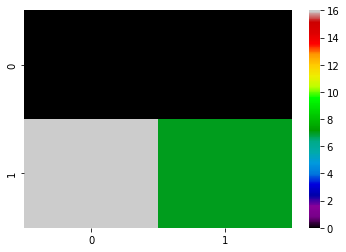

In [ ]:
constant_1 = Baseline_approach(dc_constant_1,X_train_resampled,X_test_scaled,y_train_resampled,y_test)

###Gaussian

GaussianNB() 0.9130434782608695
f1 macro score = 0.9041666666666668
accuracy score = 0.9130434782608695


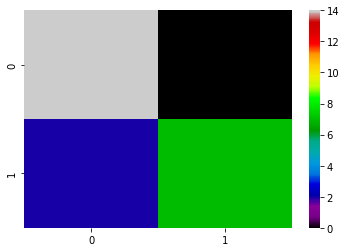

In [ ]:
clf = GaussianNB()
GNB = Baseline_approach(clf,X_train_resampled,X_test_scaled,y_train_resampled,y_test)

###kNN

KNeighborsClassifier() 0.9130434782608695
f1 macro score = 0.9041666666666668
accuracy score = 0.9130434782608695


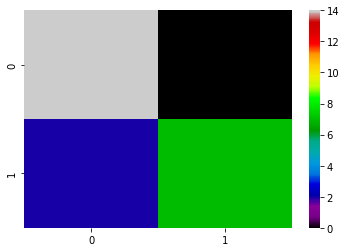

In [ ]:
clf = KNeighborsClassifier()
Knn = Baseline_approach(clf,X_train_resampled,X_test_scaled,y_train_resampled,y_test)

###Logistic Regration

LogisticRegression() 0.9565217391304348
f1 macro score = 0.9505376344086022
accuracy score = 0.9565217391304348


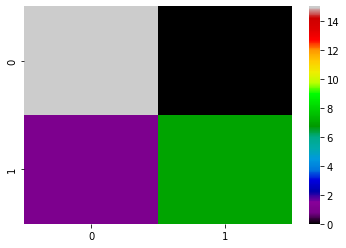

In [ ]:
clf = LogisticRegression()
LR = Baseline_approach(clf,X_train_resampled,X_test_scaled,y_train_resampled,y_test)

###Μετρικές

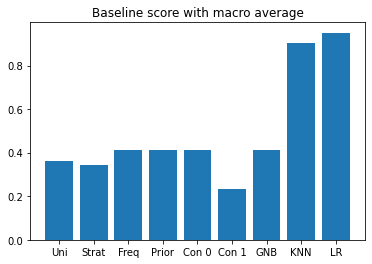

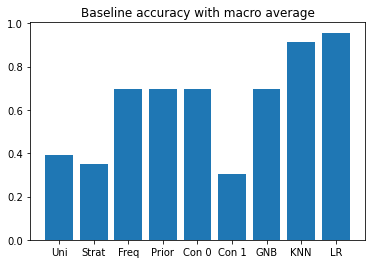

In [ ]:
classifierlist = [uniform,stratified,most_frequent,prior,constant_0,constant_1,GNB,Knn,LR]
averaged_plots(classifierlist,X_test,y_test,"Baseline")

Μετά την προεπεξεργασία βλέπουμε ότι όπως και πριν ο kNN και ο LR πετυχαίνουν τα καλύτερα αποτελέσματα ενώ ο Gaussian είναι χειρότερος απο πριν.

## Pipeline

Μια διαδικασία pipeline αποτελείται από μια σεiρα μετασχηματιστών πάνω στα χαρακτηριστικά των δεδομένων που τελειώνει σε έναν εκτιμητή.

Οι μετασχηματιστές χρησιμοποιούνται για να κανουν την προεπεξεργασία των δεδομένων. Έχουμε 5 μετασχηματιστές: την επιλογή χαρακτηριστικών VarianceThreshold, τον μετασχηματιστή κανονικοποίησης scaler, τον εξισορροπητή με τυχαία υπερδειγματοληψία RandomOverSampler και την εξαγωγή χαρακτηριστικών PCA.


Στο τέλος του pipeline VarianceThreshold - scaler - RandomOverSampler - PCA βάζουμε τον εκτιμητή - ταξινομητή που θέλουμε κάθε φορά. Οι ταξινομητές και οι υπερπαράμετροι τους δεν επιδρούν στη μορφή των δεδομένων όπως οι μετασχηματιστές αλλά έχουν προφανώς επίδραση στην απόδοση του μοντέλου.


In [ ]:
from imblearn.pipeline import Pipeline
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.decomposition import PCA

def make_pipeline(classifier, X_train, y_train, X_test, y_test):
  selector = VarianceThreshold()
  scaler = StandardScaler()
  ros = RandomOverSampler()
  pca = PCA()
  classifier = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('classifier', classifier)])
  classifier.fit(X_train,y_train)
  y_pred = classifier.predict(X_test)
  print(str(classifier),classifier.score(X_test,y_test))
  print("f1 macro score =",f1_score(y_test, y_pred, average='macro'))
  print("accuracy score =",accuracy_score(y_test, y_pred))
  return classifier

### Ορισμος pipes για κάθε classifier

In [ ]:
dc_uniform = DummyClassifier(strategy="uniform")
dc_stratified = DummyClassifier(strategy="stratified")
dc_most_frequent = DummyClassifier(strategy="most_frequent")
dc_prior = DummyClassifier(strategy="prior")
dc_constant_0 = DummyClassifier(strategy="constant", constant = 0.0)
dc_constant_1 = DummyClassifier(strategy="constant", constant = 1.0)
gaussian_NB = GaussianNB()
kNN = KNeighborsClassifier(n_jobs=-1, n_neighbors = 1)
LR = LogisticRegression()

pipe_1 = make_pipeline(dc_uniform, X_train, y_train, X_test, y_test)
pipe_2 = make_pipeline(dc_stratified, X_train, y_train, X_test, y_test)
pipe_3 = make_pipeline(dc_most_frequent, X_train, y_train, X_test, y_test)
pipe_4 = make_pipeline(dc_prior, X_train, y_train, X_test, y_test)
pipe_5 = make_pipeline(dc_constant_0, X_train, y_train, X_test, y_test)
pipe_6 = make_pipeline(dc_constant_1, X_train, y_train, X_test, y_test)
pipe_7 = make_pipeline(gaussian_NB, X_train, y_train, X_test, y_test)
pipe_8 = make_pipeline(kNN, X_train, y_train, X_test, y_test)
pipe_9 = make_pipeline(LR, X_train, y_train, X_test, y_test)

Pipeline(steps=[('selector', VarianceThreshold()), ('scaler', StandardScaler()),
                ('sampler', RandomOverSampler()), ('pca', PCA()),
                ('classifier', DummyClassifier(strategy='uniform'))]) 0.7391304347826086
f1 macro score = 0.43047619047619046
accuracy score = 0.43478260869565216
Pipeline(steps=[('selector', VarianceThreshold()), ('scaler', StandardScaler()),
                ('sampler', RandomOverSampler()), ('pca', PCA()),
                ('classifier', DummyClassifier(strategy='stratified'))]) 0.4782608695652174
f1 macro score = 0.46923076923076923
accuracy score = 0.4782608695652174
Pipeline(steps=[('selector', VarianceThreshold()), ('scaler', StandardScaler()),
                ('sampler', RandomOverSampler()), ('pca', PCA()),
                ('classifier', DummyClassifier(strategy='most_frequent'))]) 0.6956521739130435
f1 macro score = 0.41025641025641024
accuracy score = 0.6956521739130435
Pipeline(steps=[('selector', VarianceThreshold()), ('scaler', S

###Μετρικές

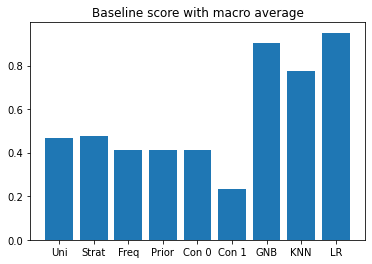

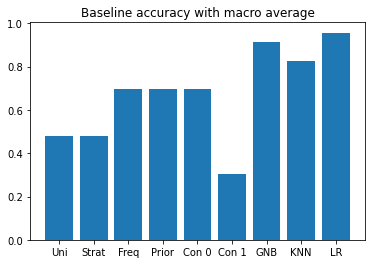

In [ ]:
classifierlist = [pipe_1,pipe_2,pipe_3,pipe_4,pipe_5,pipe_6,pipe_7,pipe_8,pipe_9]
averaged_plots(classifierlist,X_test,y_test,"Baseline")

Εδώ καλύετρα αποτελέσματα πετυχαίνουμε με τον LR ενώ λίγο χειρότερο score εχει ο Gaussian.

## Εύρεση βέλτιστων υπερπαραμέτρων

Η απόδοση όλων των πιθανών συνδυασμών υπερ-παραμέτρων μετασχηματιστών και εκτιμητή γίνεται με αναζήτηση πλέγματος (grid search). Ορίζουμε για κάθε παράμετρο ένα πεδίο ορισμού, συνήθως με ελάχιστο, μέγιστο και κάποιο βήμα και φτιάχνουμε ένα πλέγμα με όλους τους πιθανούς συνδυασμούς τιμών των παραμέτρων. 

Για κάθε τιμή υπερπαραμέτρων του grid θα πρέπει να υπολογιστεί ο μέσος όρος του εκτιμητή σε όλα τα folds του cross-validation με βάση το metric (πχ F1) και να επιλεχθεί ο καλύτερος συνδυασμός παραμέτρων. Η συγκεκριμένη στρατηγική αναζήτησης των βέλτιστων υπερπαραμέτρων είναι η εξαντλητική αναζήτηση πλέγματος (exhaustive grid search) και είναι προφανώς πολύ ακριβή υπολογιστικά. 

Συνοψίζοντας, η βελτιστοποίηση των υπερπαραμέτρων απαιτεί 

- έναν εκτιμητή (έναν ταξινομητή)
- τον πεδίο ορισμού των υπερπαραμέτρων
- ένα τρόπο αναζήτησης των πιθανών συνδυασμών τιμών τους πχ grid search
- ένα σχήμα cross-validation πχ 5-fold
- μια μετρική απόδοσης (ή score) πχ F1-macro


εδω ποιο ειναι το καλυετερο για τους γειτονες 
οχι 1 καλυετρο το 9 10

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors' :  [i + 1 for i in range(10)]}

import time
start_time = time.time()

grid = GridSearchCV(clf,param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)
print(grid.best_estimator_)
Best_grid = grid.best_estimator_.fit(X_train,y_train)
print(Best_grid.score(X_test,y_test))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n

In [ ]:
print(grid.best_estimator_)


KNeighborsClassifier(n_jobs=-1, n_neighbors=1)


Βλέπουμε ότι παίρνουμε σαν αποτέλεσμα ότι το καλύτερο είναι με έναν γείτονα.
Παρόλα αυτά κάνοντας δοκιμές βλέπουμε ότι καλύτερα αποτελέσματα πετυχαίνουμε με 9 ή 10 γείτονες.

In [ ]:
from sklearn.model_selection import GridSearchCV

mlp_param_grid ={'hidden_layer_sizes': [(100),(50,50),(25,25)], 
                    'solver': ['sgd', 'adam'],
                    'learning_rate': ['constant','adaptive']}
mlp_grid = GridSearchCV(MLPClassifier(),mlp_param_grid,refit=True,verbose=2)
mlp_grid.fit(X_train_resampled, y_train_resampled)
print("Overall fit time: " , time.time()-start_time)

start_time=time.time()
mlp_grid.predict(X_test_scaled)
print("Predict time: ", time.time()-start_time)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END hidden_layer_sizes=100, learning_rate=constant, solver=sgd; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END hidden_layer_sizes=100, learning_rate=constant, solver=sgd; total time=   0.1s
[CV] END hidden_layer_sizes=100, learning_rate=constant, solver=sgd; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END hidden_layer_sizes=100, learning_rate=constant, solver=sgd; total time=   0.1s
[CV] END hidden_layer_sizes=100, learning_rate=constant, solver=sgd; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END hidden_layer_sizes=100, learning_rate=constant, solver=adam; total time=   0.1s
[CV] END hidden_layer_sizes=100, learning_rate=constant, solver=adam; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END hidden_layer_sizes=100, learning_rate=constant, solver=adam; total time=   0.1s
[CV] END hidden_layer_sizes=100, learning_rate=constant, solver=adam; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END hidden_layer_sizes=100, learning_rate=constant, solver=adam; total time=   0.1s
[CV] END hidden_layer_sizes=100, learning_rate=adaptive, solver=sgd; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END hidden_layer_sizes=100, learning_rate=adaptive, solver=sgd; total time=   0.1s
[CV] END hidden_layer_sizes=100, learning_rate=adaptive, solver=sgd; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END hidden_layer_sizes=100, learning_rate=adaptive, solver=sgd; total time=   0.1s
[CV] END hidden_layer_sizes=100, learning_rate=adaptive, solver=sgd; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END hidden_layer_sizes=100, learning_rate=adaptive, solver=adam; total time=   0.1s
[CV] END hidden_layer_sizes=100, learning_rate=adaptive, solver=adam; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END hidden_layer_sizes=100, learning_rate=adaptive, solver=adam; total time=   0.1s
[CV] END hidden_layer_sizes=100, learning_rate=adaptive, solver=adam; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END hidden_layer_sizes=100, learning_rate=adaptive, solver=adam; total time=   0.1s
[CV] END hidden_layer_sizes=(50, 50), learning_rate=constant, solver=sgd; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END hidden_layer_sizes=(50, 50), learning_rate=constant, solver=sgd; total time=   0.2s
[CV] END hidden_layer_sizes=(50, 50), learning_rate=constant, solver=sgd; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END hidden_layer_sizes=(50, 50), learning_rate=constant, solver=sgd; total time=   0.1s
[CV] END hidden_layer_sizes=(50, 50), learning_rate=constant, solver=sgd; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END hidden_layer_sizes=(50, 50), learning_rate=constant, solver=adam; total time=   0.2s
[CV] END hidden_layer_sizes=(50, 50), learning_rate=constant, solver=adam; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END hidden_layer_sizes=(50, 50), learning_rate=constant, solver=adam; total time=   0.1s
[CV] END hidden_layer_sizes=(50, 50), learning_rate=constant, solver=adam; total time=   0.1s
[CV] END hidden_layer_sizes=(50, 50), learning_rate=constant, solver=adam; total time=   0.1s
[CV] END hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=sgd; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=sgd; total time=   0.1s
[CV] END hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=sgd; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=sgd; total time=   0.1s
[CV] END hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=sgd; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=adam; total time=   0.1s
[CV] END hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=adam; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=adam; total time=   0.1s
[CV] END hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=adam; total time=   0.1s
[CV] END hidden_layer_sizes=(50, 50), learning_rate=adaptive, solver=adam; total time=   0.1s
[CV] END hidden_layer_sizes=(25, 25), learning_rate=constant, solver=sgd; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END hidden_layer_sizes=(25, 25), learning_rate=constant, solver=sgd; total time=   0.1s
[CV] END hidden_layer_sizes=(25, 25), learning_rate=constant, solver=sgd; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END hidden_layer_sizes=(25, 25), learning_rate=constant, solver=sgd; total time=   0.1s
[CV] END hidden_layer_sizes=(25, 25), learning_rate=constant, solver=sgd; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END hidden_layer_sizes=(25, 25), learning_rate=constant, solver=adam; total time=   0.1s
[CV] END hidden_layer_sizes=(25, 25), learning_rate=constant, solver=adam; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END hidden_layer_sizes=(25, 25), learning_rate=constant, solver=adam; total time=   0.1s
[CV] END hidden_layer_sizes=(25, 25), learning_rate=constant, solver=adam; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END hidden_layer_sizes=(25, 25), learning_rate=constant, solver=adam; total time=   0.1s
[CV] END hidden_layer_sizes=(25, 25), learning_rate=adaptive, solver=sgd; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END hidden_layer_sizes=(25, 25), learning_rate=adaptive, solver=sgd; total time=   0.1s
[CV] END hidden_layer_sizes=(25, 25), learning_rate=adaptive, solver=sgd; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END hidden_layer_sizes=(25, 25), learning_rate=adaptive, solver=sgd; total time=   0.1s
[CV] END hidden_layer_sizes=(25, 25), learning_rate=adaptive, solver=sgd; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END hidden_layer_sizes=(25, 25), learning_rate=adaptive, solver=adam; total time=   0.1s
[CV] END hidden_layer_sizes=(25, 25), learning_rate=adaptive, solver=adam; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END hidden_layer_sizes=(25, 25), learning_rate=adaptive, solver=adam; total time=   0.1s
[CV] END hidden_layer_sizes=(25, 25), learning_rate=adaptive, solver=adam; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[CV] END hidden_layer_sizes=(25, 25), learning_rate=adaptive, solver=adam; total time=   0.1s
Overall fit time:  25.995039701461792
Predict time:  0.0018723011016845703


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
print(mlp_grid.best_estimator_)

Για τον MLP βλέπουμε ότι το καλύτερο είναι για 100 κρυφά επίπεδα, learning_rate='adaptive' και solver='sgd'


##Αποτελέσματα και συμπεράσματα


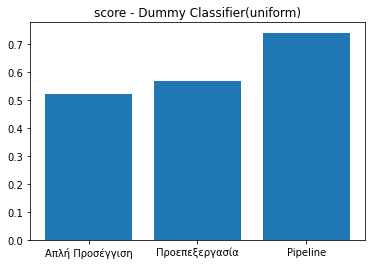

In [ ]:
x = ["Απλή Προσέγγιση", "Προεπεξεργασία", "Pipeline"]
y= [0.5217391304347826, 0.5652173913043478, 0.7391304347826086]
plt.title("score - Dummy Classifier(uniform)")
plt.bar(x,y)
plt.show()

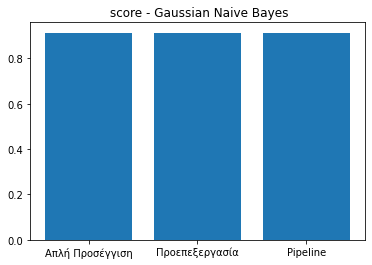

In [ ]:
y= [0.9130434782608695, 0.9130434782608695, 0.9130434782608695]
plt.title(" score - Gaussian Naive Bayes")
plt.bar(x,y)
plt.show()

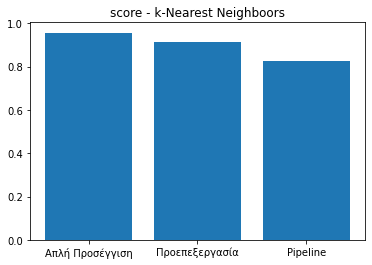

In [ ]:
y= [0.9565217391304348, 0.9130434782608695, 0.8260869565217391]
plt.title("score - k-Nearest Neighboors")
plt.bar(x,y)
plt.show()

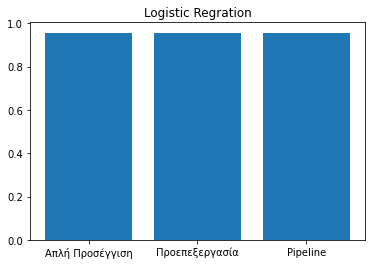

In [ ]:
y= [0.9565217391304348, 0.9565217391304348, 0.9565217391304348]
plt.title("Logistic Regration")
plt.bar(x,y)
plt.show()

Παρατηρούμε ότι στην περίπτωση του Dummy Classifier το score βελτιώνεται ενώ στους υπόλοιπους ταξινομητές έχουμε τα ίδια ή και λίγο χειρότερα scores. Όμοια αποτελέσματα παίρνουμε και αν δούμε το accuracy score η το f1-macro.